In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('lemonade.csv')

# Acquiring Data:

In [3]:
df.sample(3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
283,10/11/17,Wednesday,61.5,0.77,47,0.5,25
354,12/21/17,Thursday,40.5,1.33,23,0.5,15
96,4/7/17,Friday,59.8,0.74,44,0.5,26


# Visualization:

<AxesSubplot:xlabel='Date', ylabel='Sales'>

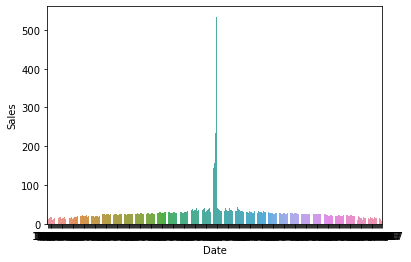

In [4]:
#Plotting Sales by Date:
sns.barplot(data=df, x = 'Date', y = 'Sales')

It appears that there is clearly some kind of anomaly toward the middle of the year.

<AxesSubplot:xlabel='Temperature', ylabel='Sales'>

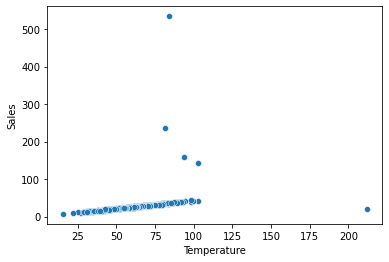

In [5]:
#Plotting Sales as a function of temperature:
sns.scatterplot(data = df, x = 'Temperature', y = 'Sales')

There are definitely anomalies in terms of temperature, too. One day shows a temperature of 225 degrees?

<AxesSubplot:xlabel='Date', ylabel='Temperature'>

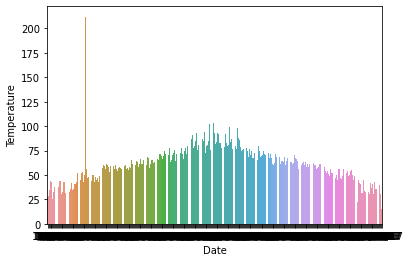

In [6]:
#Plotting Temperature with Date:
sns.barplot(data = df, x = 'Date', y = 'Temperature')

The anomalous temperature reading can be seen here again, and it appears that it occurs sometime early in the year, when temperatures are lower on average. 

# Exercises:

#### Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [7]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    # Defining values for quantiles:
    qnt1 = df.quantile(.25)
    qnt3 = df.quantile(.75)
    #Calculating the IQR:
    iqr = qnt3 - qnt1
    #Defining the lower and upper bounds:
    upper = qnt3 + (iqr * multiplier)
    lower = qnt1 - (iqr * multiplier)
    return upper, lower

## 1. Using lemonade.csv dataset and focusing on continuous variables:

### a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [8]:
cols = df.columns.to_list()
cols

['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [10]:
#Creating empty DataFrame to store upper and lower bound values:
lower_bounds = pd.DataFrame()
#Creating list of original columns that I can iterate through:
for i in cols:
    #Iterating through the columns to get the upper and lower bound for each:
    lo_bnd = get_lower_and_upper_bounds(i)
    #Adding values to dataframe for each column of the original dataframe:
    lower_bounds['low_bound'] = lo_bnd[1]

#Transposing output dataframe to make accessing bound values easier:
lower_bounds = lower_bounds.T 
lower_bounds

,Temperature,Rainfall,Flyers,Price,Sales
low_bound,16.7,0.26,4.0,0.5,5.0


In [11]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


Lower Bound for Temperature:
- There is a day where the temperature of 15.1 falls below the lower bound and would thus be considered an outlier. 

In [12]:
temp_lower = lower_bounds.Temperature[0]
df[df.Temperature < temp_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


Lower Bound for Rainfall:
- It doesn't appear that there are any lower bound outliers for rainfall. 

In [13]:
rain_lower = lower_bounds.Rainfall[0]
df[df.Rainfall < rain_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


Lower Bound for Flyers:
- It appears that there is one day that classifies as an outlier for the lower boud of flyers. 

In [14]:
flyers_lower = lower_bounds.Flyers[0]
df[df.Flyers < flyers_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


Lower Bound for Price:
- It doesn't appear that there are any outliers for the lower bound of price. 

In [16]:
price_lower = lower_bounds.Price[0]
df[df.Price < price_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


Lower Bound for Sales:
- It doesn't appear that there are any outliers for the lower bound of Sales.

In [17]:
sales_lower = lower_bounds.Sales[0]
df[df.Sales < sales_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


### b. Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [20]:
#Creating empty DataFrame to store upper and lower bound values:
upper_bounds = pd.DataFrame()
#Creating list of original columns that I can iterate through:
for i in cols:
    #Iterating through the columns to get the upper and lower bound for each:
    bounds = get_lower_and_upper_bounds(i)
    #Adding values to dataframe for each column of the original dataframe:
    upper_bounds['up_bound'] = bounds[0]

#Transposing output dataframe to make accessing bound values easier:
upper_bounds = upper_bounds.T 
upper_bounds

,Temperature,Rainfall,Flyers,Price,Sales
up_bound,104.7,1.3,76.0,0.5,45.0


Upper Bound for Temperature:
- It appears that there is one outlier for the upper bound in Temperature.

In [21]:
temp_upper = upper_bounds.Temperature[0]
df[df.Temperature > temp_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


Upper Bound for Rainfall:
 - It appears that there are 28 days in which rainfall exceeds the upper bound. However, these shouldn't necessarily be thrown out, because they all happen in January and December, meaning those months may just be exceptionally rainy, but not inherently anomalous.

In [24]:
rain_upper = upper_bounds.Rainfall[0]
df[df.Rainfall > rain_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


Upper Bound for Flyers:
- It appears that there are two days in which flyers exceed the uppper bound and appear to be anomalous. 

In [26]:
flyers_upper = upper_bounds.Flyers[0]
df[df.Flyers > flyers_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


Upper Bound for Price:
- There don't appear to be any days in which price exceeds the upper bound. 

In [27]:
price_upper = upper_bounds.Price[0]
df[df.Price > price_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


Upper Bound for Sales:
- There appear to be four days in which the upper bound is exceeded for sales. However, this occurs around the Fourth of July holiday, which is a time of high demand, and therefore not necessarily anomalous. 

In [28]:
sales_upper = upper_bounds.Sales[0]
df[df.Sales > sales_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


### c. Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

AND

### d. Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

Identifying Bounds for Multiplier of 3:

In [54]:
#Creating empty DataFrame to store upper and lower bound values:
bounds = pd.DataFrame()
#Creating list of original columns that I can iterate through:
for i in cols:
    #Iterating through the columns to get the upper and lower bound for each:
    upper, lower = get_lower_and_upper_bounds(i, 3)
    #Adding values to dataframe for each column of the original dataframe:
    bounds['up_bound'] = upper
    bounds['lower_bound'] = lower
    

#Transposing output dataframe to make accessing bound values easier:
bounds = bounds.T 
bounds

,Temperature,Rainfall,Flyers,Price,Sales
up_bound,137.7,1.69,103.0,0.5,60.0
lower_bound,-16.3,-0.13,-23.0,0.5,-10.0


In [60]:
#Creating list of column in tables:
cols = bounds.columns.to_list()

#Creating empty dictionaries for the bounds and the days that exceed them:
col_bounds = dict()
upper_outliers = dict()
lower_outliers = dict()

#Iterating through the list of columns:
for col in cols:
    #Creating variable containing the upper bound of each column:
    #bounds[col] = bounds[col][0]
    #Adding days in which the bounds are exceeded to the 'outliers' dictionary:
    upper_outliers[col] = df[df[col] > bounds[col][0]]
    lower_outliers[col] = df[df[col]< bounds[col][1]]
    

#Iterating through list of columns again:    
for col in upper_cols:
    #Printing column name:
    print(col)
    #Printing all Upper outliers within their respective columns
    print('Upper Outliers:')
    print(upper_outliers[col])
    #Adding a separator between bounds sections for each column:
    print('-----------')
    #Printig all lower outlier within their respective columns:
    print('Lower Outliers:')
    print(lower_outliers[col])
    #Adding separator between columnar sections:
    print("*************************************************\n\n")

Temperature
Upper Outliers:
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
-----------
Lower Outliers:
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
*************************************************


Rainfall
Upper Outliers:
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7
-----------
Lower Outliers:
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
*************************************************


Flyers
Upper Outliers:
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-----------
Lo

<b>Outliers Notes:</b>
- Temperature:
    - Upper: There is one anomalous day, with a temperature of 212 degrees. Literally hot enough to boil water. 
    - Lower: There do not appear to be any days that fall out of the lower bound for temperature.
- Rainfall:
    - Upper: There appear to be 4 days that fall out of the bounds of the higher bound for Rainfall. 
    - Lower: There to do not appear to be any days that fall out of the lower bound for Rainfall. 
- Flyers:
    - Upper: There do not appear to be any days that fall out of the upper bound for Flyers.
    - Lower: There appears to be one day that falls out of the lower bound for Flyers. Negative value for flyers certainly seems anonymous. 
- Price:
    - Upper: There do not appear to be any days that fall out of the upper bound for Price.
    - Lower: There do not appear to be any days that fall out of the lower bound for Price.
- Sales:
    - Upper: There appear to be 4 days that fall out of the bounds of the higher bound for Sales. However, this is 4th of July, and therefore likely not anomalous. 
    - Lower: There do not appear to be any days that fall out of the lower bound for Sales.

## Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

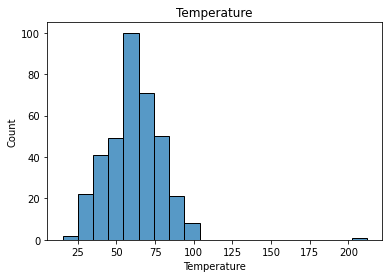

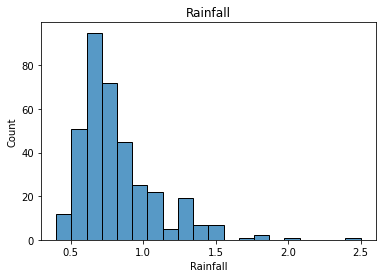

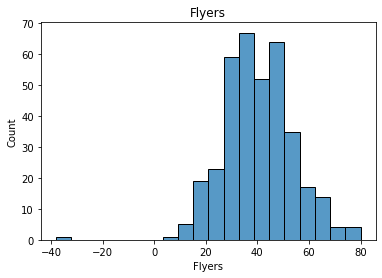

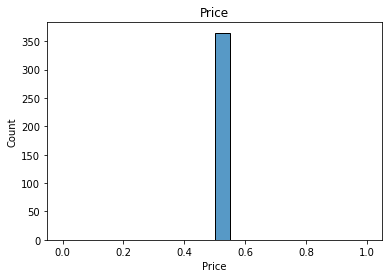

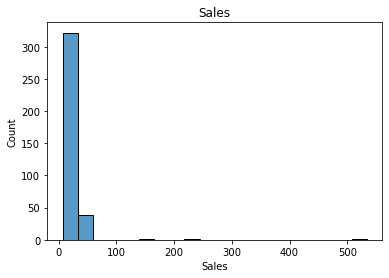

In [89]:
#Recreating list of columns in DataFrame:
cols = df.columns.to_list()

#Iterating through columns in list, excluding date and day:
for col in cols[2:]:
    #Creating 
    sns.histplot(df[col], bins = 20)
    plt.title(col)
    plt.show()

## Use a 2 sigma decision rule to isolate the outliers.

### a. Do these make sense?

### b. Should certain outliers be kept or removed?